<div style="text-align: center;"><h1>Clusterização com dataset normalizado </h1> </div>

### Imports e setup

In [1]:
import pandas as pd
import streamlit as st
import plotly.express as px
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import metrics
from plotly.subplots import make_subplots
from sklearn.base import TransformerMixin
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import pairwise_distances

color_scale = ['#00ccff','#cc00ff','#ffcc00','#0066bb','#6600bb','#bb0066','#bb6600','#ff0066','#66ff66','#ee0503']
clustering_cols = [ 'Sex', 'Smoker', 'HvyAlcoholConsump','PhysActivity','Fruits','Veggies','HighBP', 'HighChol','Stroke','HeartDiseaseorAttack','DiffWalk','Diabetes_012','BMI']

In [2]:
df = pd.read_parquet('../dfCleaned.parquet', columns=clustering_cols)
df.head()

df_toNormPadr = pd.read_parquet('../dfCleaned.parquet', columns=clustering_cols)
df_toNormPadr.head()

,Sex,Smoker,HvyAlcoholConsump,PhysActivity,Fruits,Veggies,HighBP,HighChol,Stroke,HeartDiseaseorAttack,DiffWalk,Diabetes_012,BMI
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,28.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0
3,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,24.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,25.0


# Normalização das Colunas

In [3]:
from sklearn.preprocessing import MinMaxScaler

def normalizar_coluna(df, nome_coluna):
    # Inicializar o MinMaxScaler
    scaler = MinMaxScaler()
    
    # Selecionar a coluna especificada
    coluna = df[[nome_coluna]]
    
    # Normalizar a coluna
    coluna_normalizada = scaler.fit_transform(coluna)
    
    # Retornar a coluna normalizada
    return coluna_normalizada

# Aplicar a normalização nas colunas especificadas
df_normalizado = df_toNormPadr.copy()
for col in clustering_cols:
    df_normalizado[col] = normalizar_coluna(df_toNormPadr, col)


# Padronização das Colunas

In [4]:
from sklearn.preprocessing import StandardScaler

def padronizar_coluna(df, nome_coluna):
    # Inicializar o StandardScaler
    scaler = StandardScaler()
    
    # Selecionar a coluna especificada
    coluna = df[[nome_coluna]]
    
    # Padronizar a coluna
    coluna_padronizada = scaler.fit_transform(coluna)
    
    # Retornar a coluna padronizada
    return coluna_padronizada

# Aplicar a padronização nas colunas especificadas
df_padronizado = df_toNormPadr.copy()
for col in clustering_cols:
    df_padronizado[col] = padronizar_coluna(df_toNormPadr, col)


# Calcular o Silhouette Score para Dados Normalizados

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definir o número de clusters
n_clusters = 2  # ajuste conforme necessário

# Aplicar K-Means nos dados normalizados
kmeans_normalizado = KMeans(n_clusters=n_clusters, random_state=42).fit(df_normalizado)

# Calcular o Silhouette Score para os dados normalizados
silhouette_normalizado = silhouette_score(df_normalizado, kmeans_normalizado.labels_)
print(f"Silhouette Score (Normalizado): {silhouette_normalizado}")


C:\Users\david\OneDrive\Área de Trabalho\projetos\Diabetes-PISI3\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (Normalizado): 0.16601779713151207


# Calcular o Silhouette Score para Dados Padronizados

In [6]:
# Aplicar K-Means nos dados padronizados
kmeans_padronizado = KMeans(n_clusters=n_clusters, random_state=42).fit(df_padronizado)

# Calcular o Silhouette Score para os dados padronizados
silhouette_padronizado = silhouette_score(df_padronizado, kmeans_padronizado.labels_)
print(f"Silhouette Score (Padronizado): {silhouette_padronizado}")


C:\Users\david\OneDrive\Área de Trabalho\projetos\Diabetes-PISI3\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (Padronizado): 0.20240228453025993


# Gráfico de Silhouette para Dados Normalizados

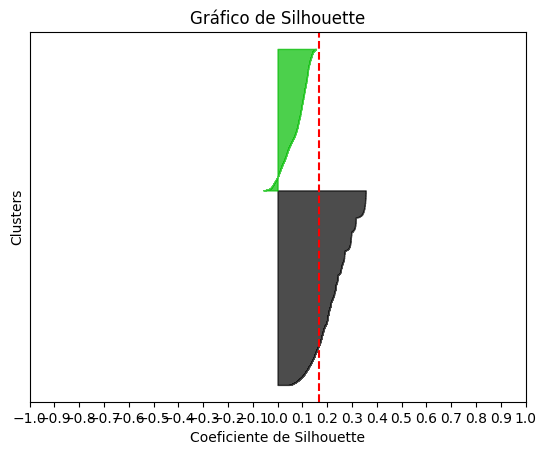

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples

# Calcular os valores de Silhouette para cada ponto
sample_silhouette_values = silhouette_samples(df_normalizado, kmeans_normalizado.labels_)

# Plotar o gráfico de Silhouette
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans_normalizado.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    y_lower = y_upper + 10

ax.set_title("Gráfico de Silhouette")
ax.set_xlabel("Coeficiente de Silhouette")
ax.set_ylabel("Clusters")
ax.axvline(x=silhouette_normalizado, color="red", linestyle="--")
ax.set_yticks([])  # Esconder marcações do eixo y
ax.set_xticks([i/10 for i in range(-10, 11)])  # Configurar marcações do eixo x

plt.show()


# Gráfico de Silhouette para Dados Padronizados

In [ ]:
# Calcular os valores de Silhouette para cada ponto
sample_silhouette_values = silhouette_samples(df_padronizado, kmeans_padronizado.labels_)

# Plotar o gráfico de Silhouette
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans_padronizado.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    y_lower = y_upper + 10

ax.set_title("Gráfico de Silhouette para Dados Padronizados")
ax.set_xlabel("Coeficiente de Silhouette")
ax.set_ylabel("Clusters")
ax.axvline(x=silhouette_padronizado, color="red", linestyle="--")
ax.set_yticks([])  # Esconder marcações do eixo y
ax.set_xticks([i/10 for i in range(-10, 11)])  # Configurar marcações do eixo x

plt.show()


### Gráfico de cotovelo

Realização de um gráfico de cotovelo para melhor visualização do número ideal de clusters no nosso dataset.

In [8]:
valores_k = []
inercias = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init=10 , random_state=42).fit(df)
    valores_k.append(k)
    inercias.append(kmeans.inertia_)

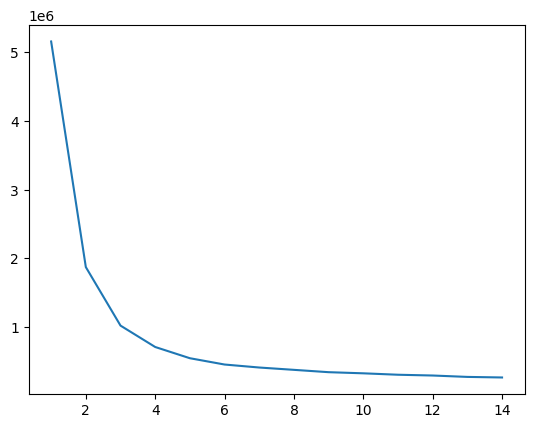

In [9]:
fig, ax = plt.subplots()
ax.plot(valores_k, inercias,)
plt.show()

Número de clusters ideal = 2.

### K-means

In [14]:
n_clusters = 2

def clusterize_kmeans(df: pd.DataFrame) -> pd.Series:
    X = df.values
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=4294967295)
    return kmeans.fit_predict(X)

def plot_cluster_kmeans(df: pd.DataFrame, cluster_col: str, cluster_name: str):
    df[cluster_col] = df[cluster_col].astype(str)
    
    cluster_summary = df.groupby(cluster_col)[clustering_cols].mean()
    
    for c in clustering_cols:
        fig = px.bar(cluster_summary, x=cluster_summary.index, y=c,
                     color=cluster_summary.index, color_discrete_sequence=color_scale,
                     labels={c: f'Média de {c}'})
        fig.show()

### Resultados com K-means

In [15]:
df_kmeans = df.copy()
df_kmeans['cluster'] = clusterize_kmeans(df_kmeans)
plot_cluster_kmeans(df_kmeans, 'cluster', 'Clusters')

d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



d:\UFRPE\PISI3\Diabetes-PISI3\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Silhouette plot

In [3]:
valores_k = []
s = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(df)
    valores_k.append(i)
    s.append(metrics.silhouette_score(df, kmeans.labels_))

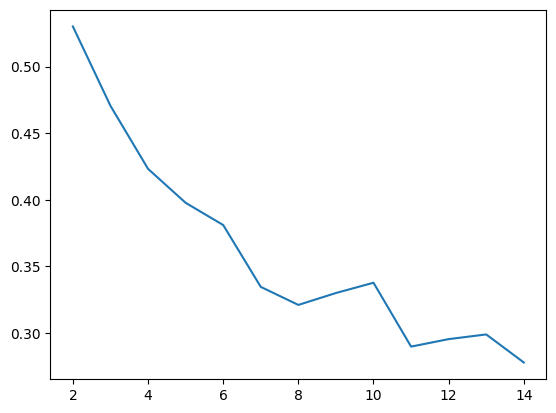

In [5]:
fig, ax = plt.subplots()
ax.plot(valores_k, s)
plt.show()

### Dataset clusterizado

In [17]:
df_kmeans.to_parquet('../ClustResult/dfKmeans.parquet')
df_kmeans.to_csv('../ClustResult/dfKmeans.csv', index=False)